<a href="https://colab.research.google.com/github/z-arabi/Machine-Learning/blob/main/logistic_regression_3_performance_measurement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/z-arabi/Machine-Learning.git
%cd Machine-Learning

Cloning into 'Machine-Learning'...
remote: Enumerating objects: 64, done.
remote: Counting objects: 100% (64/64), done.
remote: Compressing objects: 100% (60/60), done.
remote: Total 64 (delta 25), reused 10 (delta 1), pack-reused 0
Unpacking objects: 100% (64/64), done.
/content/Machine-Learning


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

from sklearn.linear_model import LogisticRegression
# Learnig curve in sklearn is the old version
from sklearn.model_selection import train_test_split, KFold, learning_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [3]:
df = pd.read_csv('./Datasets/Social_Network_Ads.csv')

df.drop('User ID', axis=1, inplace=True)
df.head(5)

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [4]:
# rather than giving df, columns > df.Gender for one series of the column
# in this way the place of columns doesn't chane
df.Gender = pd.get_dummies(df.Gender, drop_first=True)

In [5]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


In [6]:
X = df.to_numpy()

In [7]:
# random arrange
print(X.shape[0])
np.random.permutation(5)

400


array([3, 1, 0, 2, 4])

In [8]:
# now we want to shuffle the data > change the place of rows > change the indexes
np.random.seed = 0
X = X[np.random.permutation(X.shape[0])]

######################################
# 2. inplace changes occur
np.random.shuffle(X)

In [9]:
y = X[:, -1]
X = X[:, :-1]

In [10]:
# without this I couldn't get the score more than 0.62 > now=0.85
X = (X - X.mean(axis=0)) / X.std(axis=0)

# KFold

In [11]:
data_split = KFold(n_splits=5)
data_split

# data_split.split() > returns tuple > (train_inx, val_inx)

KFold(n_splits=5, random_state=None, shuffle=False)

In [12]:
# this should be x and y train
train_score = 0
val_score = 0
for train_inx, val_idx in data_split.split(X, y):
    print(len(train_inx), len(val_idx))
    clf = LogisticRegression()
    clf.fit(X[train_inx], y[train_inx])
    print('train acc =', clf.score(X[train_inx], y[train_inx]), 
          '\tval acc =', clf.score(X[val_idx], y[val_idx]))
    train_score += clf.score(X[train_inx], y[train_inx])
    val_score += clf.score(X[val_idx], y[val_idx])

print('the train score average', train_score/data_split.n_splits)
print('the validation score average', val_score/data_split.n_splits)

'''
we can see the different outputs > decide better overfit or not > the model is ok
because in each shuffle maybe we choose the simpler data as train and harder data for validation
so with one time of training we can't for sure conclude

with normalization the scores will be better for sure
why for sure > because we have estimate salary and age > two cols ranges are way different
'''

320 80
train acc = 0.853125 	val acc = 0.875
320 80
train acc = 0.8625 	val acc = 0.8125
320 80
train acc = 0.840625 	val acc = 0.825
320 80
train acc = 0.85 	val acc = 0.8625
320 80
train acc = 0.8375 	val acc = 0.8625
the train score average 0.8487500000000001
the validation score average 0.8474999999999999


"\nwe can see the different outputs > decide better overfit or not > the model is ok\nbecause in each shuffle maybe we choose the simpler data as train and harder data for validation\nso with one time of training we can't for sure conclude\n\nwith normalization the scores will be better for sure\nwhy for sure > because we have estimate salary and age > two cols ranges are way different\n"

In [13]:
'''
we want to overfit the model
for having polynomial features > 1. hstack(X,X**2,X**3) 2. Polynomial

x = np.arange(-10, 30, 1).reshape(-1, 1)
x_6 = np.hstack((x,x**2,x**3,x**4,x**5,x**6)) > just these degrees

polynomial > creates all of the sentences up to degree n > from 0 to n
form [a, b], the degree-2 polynomial features are [1, a, b, a^2, ab, b^2]
abc > 1 a b c a2 b2 c2 ab bc ac a3 b3 c3 abc a2b a2c b2c c2a c2b abc > 20
'''
from sklearn.preprocessing import PolynomialFeatures

polynomial = PolynomialFeatures(degree=6)
# fit > train/adjust
# transfrom > predict
# fit_transform > fit + predict > the input of all of the functions are based on the type whether they need y or not > if needed we have to pass the y too
X_poly = polynomial.fit_transform(X)
print(X.shape,X_poly.shape)

(400, 3) (400, 84)


In [14]:
train_score = 0
val_score = 0
for train_inx, val_idx in data_split.split(X, y):
    print(len(train_inx), len(val_idx))
    clf = LogisticRegression(max_iter=100000)
    clf.fit(X_poly[train_inx], y[train_inx])
    print('train acc =', clf.score(X_poly[train_inx], y[train_inx]), 
          '\tval acc =', clf.score(X_poly[val_idx], y[val_idx]))
    train_score += clf.score(X_poly[train_inx], y[train_inx])
    val_score += clf.score(X_poly[val_idx], y[val_idx])

print('the train score average', train_score/data_split.n_splits)
print('the validation score average', val_score/data_split.n_splits)

# 1 or 2 percentage error is ok but more than that is not
# train = 90 and validation = 90 is ok > how to know whether your model is overfitting > train acc + validation acc

320 80
train acc = 0.925 	val acc = 0.8625
320 80
train acc = 0.928125 	val acc = 0.8625
320 80
train acc = 0.921875 	val acc = 0.9125
320 80
train acc = 0.934375 	val acc = 0.8875
320 80
train acc = 0.90625 	val acc = 0.925
the train score average 0.923125
the validation score average 0.89


In [15]:
# now we have overfitted model > we can solve it by adding regularization
# they use regularization by default > l2 and c=1 > in log reg > 1/c 

train_score = 0
val_score = 0
for train_inx, val_idx in data_split.split(X, y):
    clf = LogisticRegression(max_iter=100000, C=100) # more overfit
    clf.fit(X_poly[train_inx], y[train_inx])
    # print('train acc =', clf.score(X_poly[train_inx], y[train_inx]), 
    #       '\tval acc =', clf.score(X_poly[val_idx], y[val_idx]))
    train_score += clf.score(X_poly[train_inx], y[train_inx])
    val_score += clf.score(X_poly[val_idx], y[val_idx])

print('the train score average', train_score/data_split.n_splits)
print('the validation score average', val_score/data_split.n_splits)

the train score average 0.93625
the validation score average 0.8450000000000001


In [16]:
train_score = 0
val_score = 0
for train_inx, val_idx in data_split.split(X, y):
    clf = LogisticRegression(max_iter=1000000, C=5e-5) # underfit model
    clf.fit(X_poly[train_inx], y[train_inx])
    # print('train acc =', clf.score(X_poly[train_inx], y[train_inx]), 
    #       '\tval acc =', clf.score(X_poly[val_idx], y[val_idx]))
    train_score += clf.score(X_poly[train_inx], y[train_inx])
    val_score += clf.score(X_poly[val_idx], y[val_idx])
print('the train score average', train_score/data_split.n_splits)
print('the validation score average', val_score/data_split.n_splits)

the train score average 0.7575000000000001
the validation score average 0.7525000000000001


In [17]:
'''
the penalty parameter in the function > we have only l2 > C > 1/C > solver: lbfgs
the penalty l1 > change the solver
use lasso regression for l1
GD > j=j-alpha*derivative
solvers > Each solver tries to find the parameter weights that minimize a cost function.
j'=j+alpha*(Wi**2)

improve the term of regularization > more underfit
decrease the term of regularization > more overfit

https://towardsdatascience.com/dont-sweat-the-solver-stuff-aea7cddc3451

Lasso regression changes are not to sensible regarding to the ridge regression
'''
train_score = 0
val_score = 0
for train_inx, val_idx in data_split.split(X, y):
    clf = LogisticRegression(max_iter=1000, penalty='l1', solver="saga", C=100000) # more overfit
    clf.fit(X_poly[train_inx], y[train_inx])
    # print('train acc =', clf.score(X_poly[train_inx], y[train_inx]), 
    #       '\tval acc =', clf.score(X_poly[val_idx], y[val_idx]))
    train_score += clf.score(X_poly[train_inx], y[train_inx])
    val_score += clf.score(X_poly[val_idx], y[val_idx])

print('the train score average', train_score/data_split.n_splits)
print('the validation score average', val_score/data_split.n_splits)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


the train score average 0.9037499999999999
the validation score average 0.885


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


In [18]:
train_score = 0
val_score = 0
for train_inx, val_idx in data_split.split(X, y):
    clf = LogisticRegression(max_iter=1000, penalty='l1', solver="saga", C=5e-10) # more underfir
    clf.fit(X_poly[train_inx], y[train_inx])
    # print('train acc =', clf.score(X_poly[train_inx], y[train_inx]), 
    #       '\tval acc =', clf.score(X_poly[val_idx], y[val_idx]))
    train_score += clf.score(X_poly[train_inx], y[train_inx])
    val_score += clf.score(X_poly[val_idx], y[val_idx])

print('the train score average', train_score/data_split.n_splits)
print('the validation score average', val_score/data_split.n_splits)

the train score average 0.6425000000000001
the validation score average 0.6425


In [19]:
C = [.001 , .01, .1, 1 , 10, 100 , 1000]

for c in C:
  train_score = 0
  val_score = 0
  for train_inx, val_idx in data_split.split(X, y):
      clf = LogisticRegression(max_iter=100000, C=c)
      clf.fit(X_poly[train_inx], y[train_inx])
      train_score += clf.score(X_poly[train_inx], y[train_inx])
      val_score += clf.score(X_poly[val_idx], y[val_idx])

  print(f"C is {c}---------")
  print('the train score average', train_score/data_split.n_splits)
  print('the validation score average', val_score/data_split.n_splits)

C is 0.001---------
the train score average 0.81875
the validation score average 0.8150000000000001
C is 0.01---------
the train score average 0.884375
the validation score average 0.8775000000000001
C is 0.1---------
the train score average 0.9087500000000001
the validation score average 0.89
C is 1---------
the train score average 0.923125
the validation score average 0.89
C is 10---------
the train score average 0.930625
the validation score average 0.8699999999999999
C is 100---------
the train score average 0.93625
the validation score average 0.8450000000000001
C is 1000---------
the train score average 0.940625
the validation score average 0.8324999999999999


In [20]:
clf = LogisticRegression()
clf.fit(X_poly,y)
print(clf.coef_)

[[-0.4575935   0.06157955  0.69264057  1.02220291 -0.45512982 -0.06644672
   0.18270991  0.03492709 -0.27798194  0.57837268  0.04337072  0.68998217
   1.02951277 -0.28410113  0.33663357 -0.14736617  0.22213239 -0.05214372
   0.65010363 -0.14842221 -0.45339465 -0.03884191  0.22389865  0.02356077
  -0.26451391  0.57247685 -0.02327964  0.17545304  0.07562843 -0.16355471
  -0.22881675 -0.24211306  0.17589635 -0.48169014 -0.57981909  0.0252313
   0.68842818  1.0384705  -0.28315851  0.3260509  -0.12446251  0.22120102
  -0.04512419  0.65312937 -0.15496571  0.01008656  0.06422138  0.42447626
  -0.62934211  0.62770343  0.19489194  0.20793921  0.09465738 -0.273781
   0.27345295 -0.10500804 -0.45238519 -0.01129928  0.26544579  0.01223216
  -0.25146926  0.56749735 -0.01442983  0.17364771  0.10175883 -0.16975458
  -0.2284132  -0.23954369  0.1928788  -0.50686886 -0.55470593  0.32792613
   0.14078263  0.32927924 -0.09731196 -0.05832133 -0.24289557  0.06230587
   0.18685395  0.06666999  0.24349925  0.

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [21]:
# up to now > chnage the c in the parameters of another model 
# now import each penalty directly as classifier
from sklearn.linear_model import Ridge, Lasso

# params: fit_intercept > bias / copy / ...
clf = Ridge(alpha=1000) # very strong regularization
clf.fit(X_poly,y)

# as you see the coef are too small
print(clf.coef_)

[ 0.00000000e+00  1.39844596e-03  2.46742675e-02  1.31190808e-02
  5.59490292e-05 -3.93624175e-04  3.91021314e-03  9.73997141e-03
 -6.81337377e-03  1.58984000e-02  1.40068436e-03  2.46585194e-02
  1.32755206e-02 -7.40175894e-05 -7.49004153e-04  2.42370234e-03
  2.04937600e-02 -3.47481606e-03  1.38623174e-02  9.25933812e-03
  1.11987613e-04  5.92913928e-04  4.44134020e-03  9.73701011e-03
 -6.84333993e-03  1.59953674e-02  3.99303193e-05 -4.87074930e-04
 -1.35872722e-03  7.53084513e-04  1.07403151e-02 -2.47738985e-03
  7.81652763e-03 -1.18985039e-02  1.72499882e-02  1.40516477e-03
  2.46822407e-02  1.34532098e-02  3.15540735e-04 -1.02279251e-03
  3.06364504e-03  2.04953576e-02 -3.49430295e-03  1.38079574e-02
  9.28946753e-03  1.27133283e-03 -2.92107488e-04 -2.67566721e-04
 -7.37228069e-03  3.56934098e-03  5.77689311e-04 -3.08486225e-03
  7.73797134e-04 -1.17376488e-02  1.45250329e-02  5.57207578e-04
  1.68205448e-04  1.58040107e-03  4.97957625e-03  9.74963427e-03
 -6.88425981e-03  1.61179

In [22]:
clf = Lasso(alpha=2) # very strong regularization
clf.fit(X_poly,y)
# coef zero
print(clf.coef_)

[ 0.         -0.          0.          0.         -0.         -0.
 -0.          0.         -0.          0.         -0.          0.
  0.         -0.         -0.         -0.          0.          0.
  0.          0.         -0.         -0.         -0.          0.
 -0.          0.         -0.         -0.         -0.         -0.
  0.         -0.          0.         -0.          0.         -0.
  0.          0.         -0.         -0.         -0.          0.
  0.          0.          0.         -0.          0.         -0.
 -0.         -0.          0.          0.          0.          0.
  0.          0.         -0.          0.          0.          0.
 -0.          0.         -0.         -0.         -0.         -0.
  0.         -0.          0.         -0.          0.         -0.
 -0.         -0.         -0.         -0.         -0.          0.00031064
 -0.          0.          0.          0.          0.          0.00337646]


In [23]:
# each penalty is like classifier that you can fit them on your data

# train test split

In [24]:
# define the x again

X = df.to_numpy()
np.random.seed = 0
X = X[np.random.permutation(X.shape[0])]
y = X[:, -1]
X = X[:, :-1]

In [25]:
# 1. write yourself > first suffle the rows > second split X and y > split train test val
split = int(X.shape[0] * 0.8)

X_train = X[:split]
y_train = y[:split]

X_test = X[split:]
y_test = y[split:]

In [26]:
# 2.
# random_state = 1 / random_state = np.random.seed
X_train, X_test = train_test_split(X, test_size=0.2, random_state=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [27]:
# normalization
'''
the correct way > split the data 
find the norm params on train dataset > use this to normalize all train, test, val

we rarely normalize the y
'''

mean = X_train.mean(axis=0)
std = X_train.std(axis=0)

X_train = (X_train - mean) / std
X_test = (X_test - mean) / std

In [28]:
# verbose ???
clf = LogisticRegression(verbose=1, class_weight='balanced')

In [29]:
clf.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


LogisticRegression(class_weight='balanced', verbose=1)

# Accuracy

In [30]:
print('test score:', clf.score(X_test, y_test))
print('train score:', clf.score(X_train, y_train))

test score: 0.8375
train score: 0.85


In [31]:
h_train = clf.predict(X_train)
print('ACC =', np.mean(h_train == y_train))

ACC = 0.85


In [32]:
# for sklearn.metrics > we use the true values and predicted values
accuracy_score(y_train, h_train)

0.85

# Precision

In [33]:
h_train = clf.predict(X_train)
h_test = clf.predict(X_test)

print('test precision:', precision_score(y_test, h_test))
print('train precision:', precision_score(y_train, h_train))

# TP / (TP+FP)

test precision: 0.7333333333333333
train precision: 0.7698412698412699


# Recall

In [34]:
h_train = clf.predict(X_train)
h_test = clf.predict(X_test)

print('test recall:', recall_score(y_test, h_test))
print('train recall:', recall_score(y_train, h_train))

#  TP / (TP+FN)

test recall: 0.8148148148148148
train recall: 0.8362068965517241


In [35]:
'''
we always look for the validation score > we want to kepp it high
if both the train and validation score are low > underfit
'''

'\nwe always look for the validation score > we want to kepp it high\nif both the train and validation score are low > underfit\n'

In [36]:
y_test == 1

array([False,  True,  True, False,  True,  True,  True, False, False,
       False,  True, False,  True, False,  True, False, False, False,
        True,  True,  True, False,  True, False, False, False, False,
        True,  True, False,  True, False,  True, False, False,  True,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False,  True, False,  True, False,
       False,  True, False,  True, False, False, False, False, False,
       False, False,  True, False, False, False,  True, False,  True,
       False,  True,  True, False, False, False, False, False])

In [37]:
#  * is AND in numpy array // + is OR
(y_test == 1)*(h_test == 1)

array([False,  True,  True, False,  True,  True, False, False, False,
       False,  True, False, False, False,  True, False, False, False,
       False,  True,  True, False,  True, False, False, False, False,
        True,  True, False,  True, False,  True, False, False,  True,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False,  True, False,
       False,  True, False, False, False, False, False, False, False,
       False, False,  True, False, False, False,  True, False,  True,
       False,  True,  True, False, False, False, False, False])

In [38]:
print('Test:')
print('\ttrue positive', np.mean((y_test == 1)*(h_test == 1)))
print('\tfalse positive', np.mean((y_test == 0)*(h_test == 1)))
print('\tfalse negative', np.mean((y_test == 1)*(h_test == 0)))
print('\ttrue negative', np.mean((y_test == 0)*(h_test == 0)))
print('Train:')
print('\ttrue positive', np.mean((y_train == 1)*(h_train == 1)))
print('\tfalse positive', np.mean((y_train == 0)*(h_train == 1)))
print('\tfalse negative', np.mean((y_train == 1)*(h_train == 0)))
print('\ttrue negative', np.mean((y_train == 0)*(h_train == 0)))

Test:
	true positive 0.275
	false positive 0.1
	false negative 0.0625
	true negative 0.5625
Train:
	true positive 0.303125
	false positive 0.090625
	false negative 0.059375
	true negative 0.546875


In [39]:
# the threshold is 0.5
h_train = clf.predict(X_train)
clf.predict_proba(X_train)

array([[7.66436173e-01, 2.33563827e-01],
       [1.31409591e-02, 9.86859041e-01],
       [8.62927592e-01, 1.37072408e-01],
       [9.16808529e-01, 8.31914705e-02],
       [9.54669254e-01, 4.53307456e-02],
       [9.86249886e-01, 1.37501139e-02],
       [1.55868904e-01, 8.44131096e-01],
       [9.79170893e-01, 2.08291073e-02],
       [8.49277256e-01, 1.50722744e-01],
       [9.65148715e-01, 3.48512851e-02],
       [3.35401356e-02, 9.66459864e-01],
       [9.86068719e-01, 1.39312811e-02],
       [9.03370176e-01, 9.66298237e-02],
       [2.11923780e-01, 7.88076220e-01],
       [3.01056058e-01, 6.98943942e-01],
       [7.44524377e-01, 2.55475623e-01],
       [4.24775335e-01, 5.75224665e-01],
       [3.94493818e-02, 9.60550618e-01],
       [9.97846245e-01, 2.15375525e-03],
       [2.23548066e-03, 9.97764519e-01],
       [1.55328343e-01, 8.44671657e-01],
       [7.92412890e-01, 2.07587110e-01],
       [4.35236714e-01, 5.64763286e-01],
       [6.30519158e-01, 3.69480842e-01],
       [2.570866

In [40]:
# belonging to class1
h_man = clf.predict_proba(X_train)[:, 1] > 0.5
h_man

array([False,  True, False, False, False, False,  True, False, False,
       False,  True, False, False,  True,  True, False,  True,  True,
       False,  True,  True, False,  True, False,  True, False, False,
       False,  True,  True,  True,  True, False,  True,  True,  True,
       False, False, False, False, False,  True,  True, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False,  True,  True,  True, False, False,
       False,  True,  True, False,  True,  True,  True, False, False,
       False,  True,  True, False, False, False, False,  True, False,
       False, False,  True,  True, False,  True, False, False,  True,
        True,  True,  True,  True, False, False, False,  True,  True,
        True, False,  True, False,  True, False, False, False, False,
       False,  True, False, False,  True, False, False,  True, False,
       False, False, False, False, False, False,  True,  True, False,
       False,  True,

In [41]:
# these are the same
np.mean(h_train == h_man)

1.0

In [42]:
# u can't use range in for because the index can't be float but u can use arange to create list
np.arange(0,1.001, 0.01)

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99, 1.  ])

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


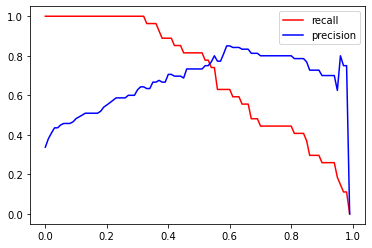

In [43]:
# we can change the threshold
test_recalls = []
test_precisions = []

for th in np.arange(0,1, 0.01):
  h_train = clf.predict_proba(X_train)[:, 1] > th
  h_test = clf.predict_proba(X_test)[:, 1] > th

  test_recalls.append(recall_score(y_test,h_test))
  test_precisions.append(precision_score(y_test,h_test))

  # print("test recall: ", recall_score(y_test,h_test))
  # print("test precision: ", precision_score(y_test,h_test))

  # print("train recall: ", recall_score(y_train,h_train))
  # print("train precision: ", precision_score(y_train,h_train))

plt.plot(np.arange(0,1, 0.01), test_recalls, 'r-', label="recall")
plt.plot(np.arange(0,1, 0.01), test_precisions, 'b-', label="precision")
plt.legend()

# the precision and recall grow in opposite directions

# F1-score

In [44]:
h_train = clf.predict(X_train)
h_test = clf.predict(X_test)

print('test f1-score:', f1_score(y_test, h_test))
print('train f1-score:', f1_score(y_train, h_train))

test f1-score: 0.7719298245614035
train f1-score: 0.8016528925619835


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


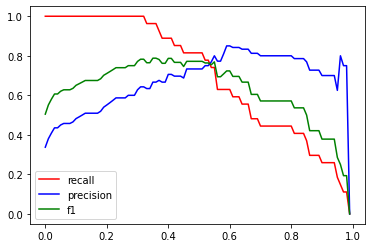

In [45]:
# we can change the threshold
test_recalls = []
test_precisions = []
test_f1 = []

for th in np.arange(0,1, 0.01):
  h_train = clf.predict_proba(X_train)[:, 1] > th
  h_test = clf.predict_proba(X_test)[:, 1] > th

  test_recalls.append(recall_score(y_test,h_test))
  test_precisions.append(precision_score(y_test,h_test))
  test_f1.append(f1_score(y_test,h_test))

  # print("test recall: ", recall_score(y_test,h_test))
  # print("test precision: ", precision_score(y_test,h_test))

  # print("train recall: ", recall_score(y_train,h_train))
  # print("train precision: ", precision_score(y_train,h_train))

plt.plot(np.arange(0,1, 0.01), test_recalls, 'r-', label="recall")
plt.plot(np.arange(0,1, 0.01), test_precisions, 'b-', label="precision")
plt.plot(np.arange(0,1, 0.01), test_f1, 'g-', label="f1")
plt.legend()

# f1 is harmonic average of precision and recall > we can find point that both of them are max > th=0.6 probably is good one

# ROC - AUC

In [46]:
# change the threshold and find the TP and FP rate > like what we did
# because of this loop unlike other metrics it needs the probability of classes not just classes
# we need class 1 because more than threshold > the class is 1
# we can't decide based on roc score > u have to compare it with others
h_test = clf.predict_proba(X_test)[:, 1]
h_train = clf.predict_proba(X_train)[:, 1]

print('test ROC-AUC:', roc_auc_score(y_test, h_test))
print('train ROC-AUC:', roc_auc_score(y_train, h_train))

test ROC-AUC: 0.9105520614954578
train ROC-AUC: 0.932196585530764


In [47]:
# balanced is better
models = [
          LogisticRegression(class_weight='balanced'), 
          LogisticRegression(),
          LogisticRegression(C=0.00001),
          LogisticRegression(C=100000)
          ]

for model in models:
    model.fit(X_train, y_train)
    h_test = model.predict_proba(X_test)[:, 1]
    
    print(roc_auc_score(y_test, h_test))

0.9105520614954578
0.9105520614954578
0.8979734451432565
0.9105520614954578


# Learning Curve

In [48]:
clf = LogisticRegression(class_weight='balanced')

# it doesn't need to first fit / train test splt / cv=cross validation
# groups > u split the train and test datas 
# train_size > with what proportion of data it will train
train_sizes, train_score, test_score = learning_curve(clf, X, y, cv=5)

In [49]:
train_sizes 
# the number of data that used to train

array([ 32, 104, 176, 248, 320])

In [50]:
train_score

array([[0.65625   , 0.28125   , 0.28125   , 0.28125   , 0.28125   ],
       [0.38461538, 0.38461538, 0.38461538, 0.38461538, 0.38461538],
       [0.38636364, 0.38636364, 0.38068182, 0.38068182, 0.38068182],
       [0.35483871, 0.35483871, 0.35080645, 0.35080645, 0.37096774],
       [0.359375  , 0.359375  , 0.35625   , 0.35625   , 0.35625   ]])

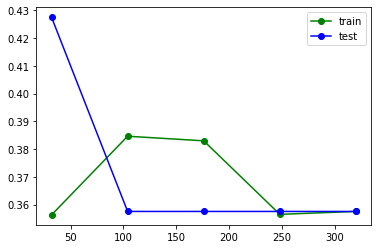

In [51]:
plt.plot(train_sizes, train_score.mean(axis=1), 'go-', label="train")
plt.plot(train_sizes, test_score.mean(axis=1), 'bo-', label="test")
plt.legend()

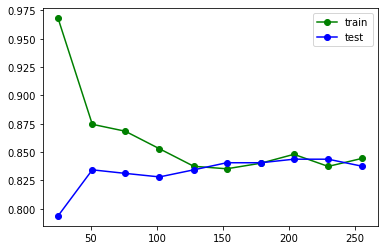

In [52]:
# learning curve with normalized data
train_sizes, train_score, test_score = learning_curve(clf, X_train, y_train, cv=5,
                                                      train_sizes=np.arange(0.1,1.1,0.1))

plt.plot(train_sizes, train_score.mean(axis=1), 'go-', label="train")
plt.plot(train_sizes, test_score.mean(axis=1), 'bo-', label="test")
plt.legend()

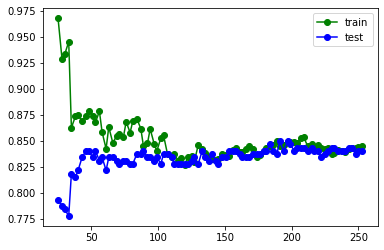

In [54]:
# one of the ways we can define whether adding data is suitable for increasing the performance is learning curve
# at the end the curve will flatten > adding data is useless > modify the model itself
train_sizes, train_score, test_score = learning_curve(clf, X_train, y_train, cv=5,
                                                      train_sizes=np.arange(0.1,1,0.01))

plt.plot(train_sizes, train_score.mean(axis=1), 'go-', label="train")
plt.plot(train_sizes, test_score.mean(axis=1), 'bo-', label="test")
plt.legend()